here we find the random grafting nodes on the first outer layer of NP (for homo and random grafting). Thank GOD 

In [ ]:
import math
import collections
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [ ]:
#from google.colab import drive#to open the google drive in colab
#drive.mount('/content/drive')

In [ ]:
lines=[]
#with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/12rcNP/np12.dat', 'r') as f: 
with open(r'C:\bloodProject\NP\NPbonds\disc\16rcDisc\disc.dat') as fp:
        for line in fp:
            if 'Atoms' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'Velocities' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    lines.append(line)# add the string in to the list
                    #lines= line.split("space")# for line in a pandas data frame. here it can not read our lines separetely. it reads all lines as a line so does not split it into different indexs

In [ ]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [ ]:
df=pd.DataFrame(lines, columns=['atomID']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomID','atomType','x','y','z','mx','my','mz']] = df.atomID.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
df

In [ ]:
atom_counter=len(df)
atom_counter

In [ ]:
#find distance between the beads
Xmsd=np.zeros ((atom_counter,atom_counter))# make 2D arrays
Ymsd=np.zeros ((atom_counter,atom_counter))
Zmsd=np.zeros ((atom_counter,atom_counter))
#Rmsd=np.zeros ((atom_counter,atom_counter))
Rmsd=np.zeros ((atom_counter+1,atom_counter+1)) # bc of last rmsd for second layer of outer layer
# #double array bc we want compare distances for each i and j  with each other
min_Rmsd=np.zeros (atom_counter)
min_all=np.zeros (atom_counter)

df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)

#smallest = float("inf") # infinity


for i in range(0, atom_counter-1):
  smallest = float("inf") # infinity. to renew after each i to just find min of each i not min of the whole.
  for j in range(i+1, atom_counter):
  
    dx=df.loc[j,'x']-df.loc[i,'x']
    dy=df.loc[j,'y']-df.loc[i,'y']
    dz=df.loc[j,'z']-df.loc[i,'z']

    Xmsd[i,j]+=np.power(dx,2)
    Ymsd[i,j]+=np.power(dy,2)
    Zmsd[i,j]+=np.power(dz,2)
        
    #distance of all beads from each other without repeating 2-1 after calc distance of 1-2. it is distance of 3 and 4 and is not distance 3 ordistance of 4. Rmsd[3,4] and not Rmsd[3] or Rmsd[4]
    Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);
    
    #find the min of Rmsd array
    num= float(Rmsd[i,j])    
    smallest = min(smallest,num)
    min_Rmsd[i]=smallest
    #print (j,"  ",i,"  ",Rmsd[i,j],"   ",min_Rmsd[i])
    #print(i,"  ",Rmsd[i,j])

   

In [ ]:

#print (Rmsd[0,:])
print(min_Rmsd[:])

In [ ]:
#to find min of all min_Rmsd
smallest = float("inf") # infinity
for i in range(0, atom_counter-1): # we have five bond (distance) between 6 beads
    num= float(min_Rmsd[i])    
    smallest = min(smallest,num)
    min_all[i]=smallest
    #smallest_bead_distance= round(min_all[i],4)# round the float to 4 decimal
    smallest_bead_distance= min_all[i]
print (i,"    ",smallest_bead_distance)

In [ ]:
print(round(smallest_bead_distance,4))

**find the bond list and print it in a file. Thank GOD!**

combine this code with double for loop above to save time

In [ ]:
#here we combine two tasks above to make the code faster and so we do:
#1) find beads that have the min of distances and then count number of bonds with that size( distance) each bead has 
#2)show the beads with the least distance with each bead in front of that bead and print in a file
counter_bond=0 # to count total number of  bonds
#bonded_beads_i=np.zeros((atom_counter,atom_counter))
#bonded_beads_j=np.zeros((atom_counter,atom_counter))


count_bonded=np.zeros(atom_counter)
i=0
j=0



 #for i in range(0, 9):
for i in range(0, atom_counter-1):
   counter=0  
   for j in range(i+1, atom_counter):
    #print(round(Rmsd[i,j],4))
    if round(Rmsd[i,j],4) == round(smallest_bead_distance,4):
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
       counter_bond+=1

       count_bonded[i]+=1 # count number of bonds
print(counter_bond)

In [ ]:
#to find max # of bonds a bead can have
largest = float("-inf") # infinity
max_bond= np.zeros(atom_counter)
i=0


for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded[i])    
    largest = max(largest,num)
    max_bond[i]=largest
    
print (i,"    ",max_bond[i])
maximum_bond=max_bond[i].astype(int)

here we read the bonds and for bond j which is a 3d array we convert it to 1D all in this code

In [ ]:
#here we combine 3 tasks above to make the code faster and so we do:
#1) find beads that have the min of distances and then count number of bonds with that size( distance) each bead has 
#2)show the beads with the least distance with each bead in front of that bead and print in a file
#3)thank GOD thank GOD read array of bounded_beads_j and put in a 1D array

counter_total_bond=0 # to count total number of  bonds
counter_j=0
bonded_beads_arr_j=np.zeros(counter_bond)
bonded_beads_i=np.zeros((atom_counter,maximum_bond+1))
bonded_beads_j=np.zeros((atom_counter,atom_counter,maximum_bond+1)) # 3d array

i=0
j=0

df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int




for i in range(0, atom_counter-1):
   counter=0  
   for j in range(i+1, atom_counter):

    if round(Rmsd[i,j],4) == round(smallest_bead_distance,4):
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
       counter_total_bond+=1
       #print(i,'',j,'',Rmsd[i,j])

       bonded_beads_i[i][counter]=df.loc[i,'atomID'] # to save the beads that have least distance with a bead in an array for that bead as i
       bonded_beads_j[i][j][counter]=df.loc[j,'atomID'] # to save the beads that have least distance with a bead in an array for that bead as j
          
       if bonded_beads_j[i][j][counter] != 0: # Thank GOD! for j bond we need to put the 3D array to 1D in here otherwise I have to make a 3 for loop to read this 3D array and then put in a 1D array which is very time consuming
             bonded_beads_arr_j[counter_j] =bonded_beads_j[i][j][counter]  #convert 3D to 1D array Thank GOD!
             #print(i,'  ',j,'   ',counter_j,'  ',bonded_beads_arr_j[counter_j])
             counter_j+=1
       
       
       # to print in a file
       #original_stdout = sys.stdout # Save a reference to the original standard output
       #sys.stdout = f # Change the standard output to the file we created.
       #print( i,"   ",counter,"   ",j,"   ",int(bonded_beads_j[i][j][counter]))
       #print( i,"   ",j,"   ", int(bonded_beads_i[i][counter]),"    ",int(bonded_beads_j[j][counter]))
       #sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
int(bonded_beads_j[1][2][1])

here for i bonds we read the array and in next code we convert the 2D array of bonds i to a 1D array

combine this code with the code below it to save time

In [ ]:
#thank GOD read the array bonded_beads_i
i=0
counter=0


#for i in range(1, counter_bond):# use counter bond because we want go through all the bonds which is equal to (num_atoms * maximum bond an atom can have)
for i in range(0, atom_counter):
   for counter in range(1, maximum_bond+1): #since max # of bonds is 4 so our matrix has dimension of 4 in this direction
     if bonded_beads_i[i][counter] != 0: 
       print( i,"   ",int(bonded_beads_i[i][counter]))

In [ ]:
bonded_beads_i.shape

In [ ]:
#put bonds of i in a 1D array


#bonded_beads_arr_i=np.zeros(29)
#bonded_beads_arr_j=np.zeros(29)
bonded_beads_arr_i=np.zeros(counter_bond)



counter_i=0

i=0
j=0





#for i in range(0, 29):
#for i in range(1, counter_bond):
for i in range(0, atom_counter):
   for j in range(1, maximum_bond+1):

      if bonded_beads_i[i,j] != 0: 
        bonded_beads_arr_i[counter_i] = bonded_beads_i[i,j]  #convert 2D to 1D array Thank GOD!
        print(i,'  ',j,'   ',counter_i,'  ',bonded_beads_arr_i[counter_i])
        counter_i+=1
      
    
#print(df.loc[i,'atomID'],'   ',bonded_beads_arr) # for atomID= 4

In [ ]:
#read number of bonds in these two arrays
bonded_beads_arr_j.astype(int)
#bonded_beads_arr_j.shape

In [ ]:
bonded_beads_arr_i.astype(int)
#bonded_beads_arr_i.shape

**count total number of bond that each bead has**

In [ ]:
#for j column
i=0
j=0
count_bonded_j=np.zeros(atom_counter)
#count_bonded_j=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond): 
#for i in range(0, 29):  #over all the beads

  for j in bonded_beads_arr_j.astype(int): # over the beads in array

    #if bonded_beads_arr_i[i].astype(int)==j :  # check how many of a certain bead are in the array
    #if i==j :  # check how many of a certain bead are in the array
    if (i+1)==j : # since the bond of j has several zero bonds so we start i from 1 to not read those zeros.
      count_bonded_j[i]+=1
      print(i,'  ',j,'  ',count_bonded_j[i])
      #print(i,'', j)

In [ ]:
#for i column
i=0
j=0
count_bonded_i=np.zeros(atom_counter)
#count_bonded_i=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond):
#for i in range(0, 29):  #over all the beads
#for i in bonded_beads_arr_i:  #over all the beads
  for j in bonded_beads_arr_i.astype(int): # over the beads in array

    #if bonded_beads_arr_i[i].astype(int)==j :  # check how many of a certain bead are in the array
    #if i==j :  # check how many of a certain bead are in the array
    if (i+1)==j:
      count_bonded_i[i]+=1
      print(i,'  ',count_bonded_i[i])
      #print(i,'', j)

In [ ]:
#  thank GOD count total bonds for each bead
#count_bonded_total=np.zeros(268)
count_bonded_total=np.zeros(atom_counter)
#count_bonded_total=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond):
#for i in range(0, 29):  #over all the beads
   count_bonded_total[i]=count_bonded_i[i]+count_bonded_j[i]
   print(i,' ', count_bonded_total[i])

In [ ]:
#to find min # of bonds a bead has in our NP
smallest = float("inf") # infinity
min_bond= np.zeros(atom_counter)
i=0

for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded_total[i])    
    smallest = min(smallest,num)
    min_bond[i]=smallest
    
print (i,"    ",min_bond[i])

In [ ]:
#to find max # of bonds a bead can have
largest = float("-inf") # infinity
max_bond= np.zeros(atom_counter)
i=0

for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded_total[i])    
    largest = max(largest,num)
    max_bond[i]=largest
    
print (i,"    ",max_bond[i])

in our nanoparticle which is made with simple hexagonal lattice the center beads can have 8 bonds in general.

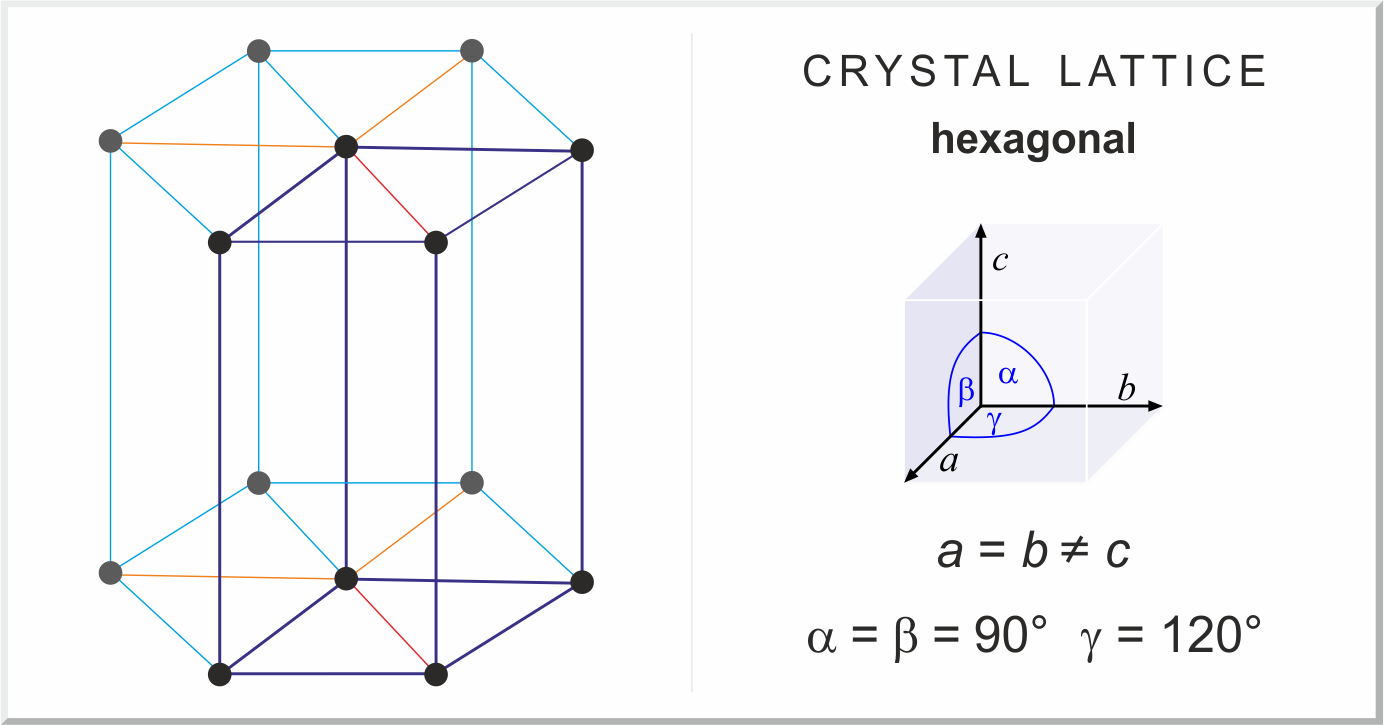

**first layer of the two outer layers**



In [ ]:
# to find beads with 3 bonds( the first outer layer of beads) and change their atom type in atom list.

countType=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  #if count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7:
  if count_bonded_total[index] == 3 or count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7: #test 95 beads
    countType+=1
    #df.loc[index,"atomType"] = df.loc[index,"atomType"]+1
    df.loc[index,"atomType"] = '4'
    
print (countType)
    #df.loc[df['atomID'] >atmCounter , 'atomID'] = df.loc[index,"atomID"]-atmCounter    #to modify the column of atomID after deleting the atoms of toluene in atom list. it is a if condition in python
print(df)

In [ ]:
for index in df.index:
  print(df.loc[index,"atomType"])

In [ ]:
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/12rcNP/atomTypeFirstOuterLayer.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
#to write data frame with different atomType for first outer layer to a file
df.to_csv('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/8rcNP/dataFrameFirstOutLayer.dat', mode='w',  sep=" ", header=False)

In [ ]:
# we save the index of first layer beads and other beads in arrays 


other_atomNumber=atom_counter-countType

atomID_firstLayer_arr=np.zeros (countType)# df.shape[0] count number of rows in the data frame pandas
atomID_other_arr=np.zeros (other_atomNumber)# df.shape[0] count number of rows in the data frame pandas
count_firstLayer=0
count_other=0

for index in df.index:
  #if count_bonded[index] < 4:
   #if count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7:
   if count_bonded_total[index] == 3 or count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7: #test 95 beads  
     #atomID_firstLayer_arr[count_firstLayer]= df.loc[index,'atomID']
     atomID_firstLayer_arr[count_firstLayer]= index # we save the index instead of atomID because in next parts of code we want to find distance of beads in this array so we need their index
     count_firstLayer+=1
   else:
     #atomID_other_arr[count_other]=df.loc[index,'atomID']  
     atomID_other_arr[count_other]=index 
     count_other+=1
    

print(atomID_other_arr.astype(int))
atomID_other_arr.shape
 

In [ ]:
print(atomID_firstLayer_arr.astype(int))
atomID_firstLayer_arr.shape

find grafting nodes

#  Random distribution:

# -----**Second way of finding random nodes on the first layer of NP**----


# Homo ligands

find 604 random nodes among 1442 atomIDs in the atomID_firstLayer_arr

In [ ]:
#print(atomID_firstLayer_arr.astype(int))
atomID_firstLayer_arr.shape

In [ ]:
#Random Subsample From a List
	
# select a random sample without replacement
from random import seed
from random import sample
# seed random number generator
seed(1)
atomID_firstLayer_list= atomID_firstLayer_arr.tolist()
nodes = sample(atomID_firstLayer_list, 604)# since the sample code does just work with a list and not an array so we converted our array to a list
#nodes_atomID = [x+1 for x in nodes] # to add 1 to the nodes indexs bc in data file atomID is 1 more than indexes
nodes_atomID = [x for x in nodes]  

print(nodes_atomID)

In [ ]:
len(nodes_atomID)

In [ ]:
with open(r'C:\bloodProject\NP\NPbonds\disc\16rcDisc\604nodesAtomID.dat' , 'w') as f: 
    
   
 original_stdout = sys.stdout # Save a reference to the original standard output
 sys.stdout = f # Change the standard output to the file we created.
 print(nodes_atomID)
 sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
# to refresh the data frame (use it when I want to calc seccond grafting density)

countType=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  if index in atomID_firstLayer_arr:  
    countType+=1
    
    df.loc[index,"atomType"] = '4' #atom type of 302 nodes
    
#print(df)
print(countType)

In [ ]:
# to  change nodes atom type in atom list.

countType=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  if index in nodes_atomID:  
    countType+=1
    
    df.loc[index,"atomType"] = '7' #atom type of 302 nodes
    
#print(df)
print(countType)

In [ ]:
for index in df.index:
  print(index,'  ',df.loc[index,"atomType"])

In [ ]:
#print only the atom type
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\340homoNodesAtomID.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

=========================================================================================

## random ligand 
find 302 random nodes among 604 nodes of ligands to have a random ligand (hydrophobic and hydrophilic)

In [ ]:
#Random Subsample From a List
	
# select a random sample without replacement
from random import seed
from random import sample
# seed random number generator
seed(1)

ligands = sample(nodes_atomID, 302)# since the sample code does just work with a list and not an array so we converted our array to a list
#nodes_atomID = [x+1 for x in nodes] # to add 1 to the nodes indexs bc in data file atomID is 1 more than indexes

print(ligands)

In [ ]:
len(ligands)

In [ ]:
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\170randomLigands.txt' , 'w') as f: 
    
   
 original_stdout = sys.stdout # Save a reference to the original standard output
 sys.stdout = f # Change the standard output to the file we created.
 print(ligands)
 sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
# to  change nodes atom type in atom list.

countType=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  if index in ligands:  
    countType+=1
    
    df.loc[index,"atomType"] = '8' #atom type of 302 nodes
    
#print(df)
print(countType)

In [ ]:
for index in df.index:
  print(index,'  ',df.loc[index,"atomType"])

In [ ]:
#print only the atom type
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\170randomLigandsAtomID.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

# end of finding random nodes for grafting density of ligands#######

# --------------------------------------------------------------------------------------------

# Finding Janus nodes for grafting the ligands

In [ ]:
#atomID_firstLayer_arr.shape
count_firstLayer

In [ ]:
for index in atomID_firstLayer_arr: 
    y=df.loc[index,'y']
    print (y)

In [ ]:
hemisphereBead_number=int((count_firstLayer)/2)
atomID_upperNodes_arr=np.zeros (hemisphereBead_number) #upper hemisphere of NP
atomID_lowerNodes_arr=np.zeros (hemisphereBead_number) #lower hemisphere of NP 
count1=0
count2=0
#here since the disc sircumpherence (circlualr surface) has radius in x and y directions we choose the half of its radius in x direction
for index in atomID_firstLayer_arr: 
    x=df.loc[index,'x']
    if x>0: #since the middle of disc has x=0 we consider beads above x=0 and below x=0
      atomID_upperNodes_arr[count1]=index
      count1+=1
    if x<0:
      atomID_lowerNodes_arr[count2]=index
      count2+=1
print(count1,'',atomID_upperNodes_arr)
#print(count2,'',atomID_lowerNodes_arr)

In [ ]:
#atomID_upperNodes_arr.shape
atomID_upperNodes_arr[atomID_upperNodes_arr != 0].shape

## ** finding 340 random nodes on the upper nodes and lower nodes (from first layer beads in upper hemisphere) of 12rc NP**


**find 170 random nodes among 363 atomIDs in the atomID_upperNodes_arr**

In [ ]:
#Random Subsample From a List
	
# select a random sample without replacement
from random import seed
from random import sample
# seed random number generator
seed(2)
atomID_upperNodes_arr=atomID_upperNodes_arr[atomID_upperNodes_arr != 0] #remove extra zeros from array
atomID_upperNodes_list= atomID_upperNodes_arr.tolist()
upperNodes = sample(atomID_upperNodes_list, 170)# since the sample code does just work with a list and not an array so we converted our array to a list
#nodes_atomID = [x+1 for x in nodes] # to add 1 to the nodes indexs bc in data file atomID is 1 more than indexes
upperNodes_atomID = [x for x in upperNodes]  

print(upperNodes_atomID)

In [ ]:
len(upperNodes_atomID)

# ------------------------------------------------------------------

In [ ]:
atomID_lowerNodes_arr[atomID_lowerNodes_arr != 0].shape
#print(atomID_lowerNodes_arr)

 **find 170 random nodes among 363 atomIDs in the atomID_lowerNodes_arr**

In [ ]:
#Random Subsample From a List
	
# select a random sample without replacement
from random import seed
from random import sample
# seed random number generator
seed(2)
atomID_lowerNodes_arr=atomID_lowerNodes_arr[atomID_lowerNodes_arr != 0] #remove extra zeros from array
atomID_lowerNodes_list= atomID_lowerNodes_arr.tolist()
lowerNodes = sample(atomID_lowerNodes_list, 170)# since the sample code does just work with a list and not an array so we converted our array to a list
#nodes_atomID = [x+1 for x in nodes] # to add 1 to the nodes indexs bc in data file atomID is 1 more than indexes
lowerNodes_atomID = [x for x in lowerNodes]  

print(lowerNodes_atomID)

In [ ]:
len(lowerNodes_atomID)

In [ ]:
#with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/8rcNP/upperNodes.txt' , 'w') as f: 
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\170janusUpperNodes.txt', 'w') as f:     
   
 original_stdout = sys.stdout # Save a reference to the original standard output
 sys.stdout = f # Change the standard output to the file we created.
 print(upperNodes_atomID)
 sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
#with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/8rcNP/lowerNodes.txt' , 'w') as f: 
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\170janusLowerNodes.txt', 'w') as f:     
   
 original_stdout = sys.stdout # Save a reference to the original standard output
 sys.stdout = f # Change the standard output to the file we created.
 print(lowerNodes_atomID)
 sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
# to refresh the data frame (use it when I want to calc seccond grafting density)

countType=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  if index in atomID_firstLayer_arr:  
    countType+=1
    
    df.loc[index,"atomType"] = '4' #atom type of 302 nodes
    
#print(df)
print(countType)

In [ ]:
# to  change the janus nodes atom type in atom list.

countType=0
countType2=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  if index in upperNodes_atomID:  
    countType+=1
    
    df.loc[index,"atomType"] = '7' #atom type of 302 nodes
    
  if index in lowerNodes_atomID:  
    countType2+=1
    
    df.loc[index,"atomType"] = '8' #atom type of 302 nodes
#print(df)
print(countType)

In [ ]:
for index in df.index:
  print(index,'  ',df.loc[index,"atomType"])

In [ ]:
#print only the atom type
#with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/8rcNP/atomTypeNodes3.dat', 'w') as f: 
with open(r'C:\bloodProject\NP\NPbonds\12rcNP\340Lig12rcNPJanusAtomType.dat', 'w') as f:  
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

# end of finding janus nodes for grafting density of ligands#######

# =============================================================

-------------------------------------------------
## **find second outer layer**

In [ ]:
atomID_other_arr.shape
atomID_firstLayer_arr.shape
len(atomID_other_arr)
atom_counter
counter

In [ ]:
Xmsd=np.zeros ((atom_counter,atom_counter))# make 2D arrays
Ymsd=np.zeros ((atom_counter,atom_counter))
Zmsd=np.zeros ((atom_counter,atom_counter))
#Rmsd=np.zeros ((atom_counter,atom_counter))
Rmsd=np.zeros ((atom_counter+1,atom_counter+1)) # bc of last rmsd for second layer of outer layer
# #double array bc we want compare distances for each i and j  with each other

j=0
i=0
bonded_beads_Second_Outer=np.zeros(counter_bond)
counter2=0
counter_bond2=0 # to count total number of  bonds

df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)

bondedBeads_secondLayer=np.zeros((atom_counter+1,atom_counter+1,maximum_bond+1))
#bondedBeads_secondLayer=np.zeros((len(atomID_other_arr),len(atomID_other_arr),len(atomID_firstLayer_arr)))
#bondedBeads_secondLayer=np.zeros((1,1,1))

In [ ]:
#find distance between the beads of other beads and beads of first outer layer
# if distance is equal to bond distance put the atom ID in an array
# convert 3D array to 1D

for i in atomID_other_arr[:].astype(int):
  counter=0
  for j in atomID_firstLayer_arr[:].astype(int): #is the number itself in the array and not the index of the numbers in the array 
      
    dx=df.loc[j,'x']-df.loc[i,'x']
    dy=df.loc[j,'y']-df.loc[i,'y']
    dz=df.loc[j,'z']-df.loc[i,'z']

    Xmsd[i,j]+=np.power(dx,2)
    Ymsd[i,j]+=np.power(dy,2)
    Zmsd[i,j]+=np.power(dz,2)
        
    #distance of all beads from each other without repeating 2-1 after calc distance of 1-2. it is distance of 3 and 4 and is not distance 3 ordistance of 4. Rmsd[3,4] and not Rmsd[3] or Rmsd[4]
    Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);



    if round(Rmsd[i,j],4) == round(smallest_bead_distance,4):
       
       counter_bond2+=1
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array              
       bondedBeads_secondLayer[i][j][counter]= i  # here i and j are atomIDs in the arrays and not just index of array so we do not need to again find the atomID of this atomIDs
       #print(counter,'   ',bondedBeads_secondLayer[i][j][counter])
       

       if bondedBeads_secondLayer[i][j][counter] != 0:
      
         bonded_beads_Second_Outer[counter2] = bondedBeads_secondLayer[i][j][counter]  #convert 2D to 1D array Thank GOD!
         counter2+=1
      
       #print(counter_bond2,'   ',bonded_beads_Second_Outer) # for atomID= 4
       print(counter2,'   ',bonded_beads_Second_Outer) # for atomID= 4

In [ ]:
bonded_beads_Second_Outer

In [ ]:
# to find beads other than first outer layer of beads  and change their atom type in atom list.

df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int
counter=0
 
for index in atomID_other_arr.astype(int): 
    counter+=1
    
    df.loc[index,"atomType"] = '3'
   
print(df)
print(counter)

In [ ]:
# to find beads that have bonds with the first outer layer of beads (find the second outer layer) and change their atom type in atom list.

df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int
counter=0

for index in bonded_beads_Second_Outer.astype(int):  
 #if index != 0:
    counter+=1
    
    df.loc[index,"atomType"] = '4'
    
print(df)
print(counter)

In [ ]:
for index in df.index:
  print(df.loc[index,"atomType"])

# here I have second method of finding second outer layer which is essential for large NP

In [ ]:
#Thank GOD! here we check the distance of beads of first layer ( in the atomID_arr) with other beads and if the distance is the smallest distance it means they have bond so we could find bead that have bond with first layer beads
# then put the beads of second layer in an array
bonded_beads=np.zeros((atom_counter,atom_counter))
bonded_beads_4=np.zeros((atom_counter,atom_counter))

counter_bond=0 # to count total number of  bonds
index=0
i=0

#for index in atomID_arr[:].astype(int): #is the number itself in the array and not the index of the numbers in the array
  #counter=0
  #for i in range(0, atom_counter-1):
for i in range(0, atom_counter):
  counter=0
  for index in atomID_firstLayer_arr[:].astype(int): #is the number itself in the array and not the index of the numbers in the array     
   
    #if round(Rmsd[index,i],4) == smallest_bead_distance:
    if round(Rmsd[i,index],4) == round(smallest_bead_distance,4):
       
       counter_bond+=1
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
      
       
       #bonded_beads [index][i]= df.loc[i,'atomID']  # to save the atomID of beads that have least distance with a bead, in an array for that bead
       #bonded_beads_4[index][counter]=bonded_beads[index][i]
       
       bonded_beads [i][index]= df.loc[i,'atomID']  # to save the atomID of beads that have least distance with a bead, in an array for that bead
       bonded_beads_4[i][counter]=bonded_beads[i][index]
       
       
       
      #here index is atomID
       #print(index)
       #print(counter_bond,'  ',index,'  ',counter)
       print(counter_bond,'  ',i,'  ',counter,'  ',int(bonded_beads_4[i][counter]))

In [ ]:
#convert 2D to 1D array Thank GOD!

#bonded_beads_Second=np.zeros((496,5))
#bonded_beads_Second_Outer=np.zeros(495)
bonded_beads_Second_Outer=np.zeros(counter_bond)
counter=0

for i in range (0, atom_counter):
  for j in range (1,5):
    if bonded_beads_4[i,j] != 0:
      
      #if i in bonded_beads_4:
      #bonded_beads_Second[counter,j] = bonded_beads_4[i,j]
      bonded_beads_Second_Outer[counter] = bonded_beads_4[i,j]  #convert 2D to 1D array Thank GOD!
      counter+=1
      #print(counter)
      print(counter,'   ',bonded_beads_Second_Outer) # for atomID= 4

In [ ]:
bonded_beads_Second_Outer.shape

In [ ]:
# to find beads that have bonds with the last outer layer of beads (find the second outer layer) and change their atom type in atom list.

df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

#for index in range (1,atom_counter):
   #if index in bonded_beads_Second_Outer:
for index in bonded_beads_Second_Outer.astype(int):   
  #if (index).any != 0 :
    #print(index)
    #df.loc[index,"atomType"] = df.loc[index,"atomType"]+1
    df.loc[index,"atomType"] = '2'
   
print(df)

In [ ]:
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/8rcNP/atomTypeSecondOuterLayer2.dat', 'w') as f: 
  counter=0 
  for index in df.index:
    #if df.loc[index,"atomType"] =='2':
      #counter+=1

      original_stdout = sys.stdout # Save a reference to the original standard output
      sys.stdout = f # Change the standard output to the file we created.
      print(df.loc[index,"atomType"])
      #print(counter,'  ',index,'  ',df.loc[index,"atomType"])
      sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
#to write data frame to a file
df.to_csv('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/8rcNP/dataFrameSecondOuterLayer.dat', mode='w',  sep=" ", header=False)